# Question 1 #
Introduction:<br>
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.<br>
Occupations<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called users<br>
Step 4. Discover what is the mean age per occupation<br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least<br>
Step 6. For each occupation, calculate the minimum and maximum ages<br>
Step 7. For each combination of occupation and sex, calculate the mean age<br>
Step 8. For each occupation present the percentage of women and men<br>

In [15]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

#Step 3. Assign it to a variable called users
users = pd.read_csv(url,delimiter= '|')

print(users.head(5))

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [19]:
#Step 4. Discover what is the mean age per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [36]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
#add colomn that male is True and female is False
users['is_male']=users['gender'].apply(lambda x: True if x=='M' else False)

(users.groupby('occupation')['is_male'].sum()/users.groupby('occupation')['gender'].count()).sort_values(ascending=False)*100
#https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/#:~:text=A%20Percentage%20is%20calculated%20by,also%20applicable%20in%20Pandas%20Dataframes.
#https://www.datacamp.com/community/tutorials/pandas-sort-values?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9000791&gclid=CjwKCAjwr56IBhAvEiwA1fuqGne8BivvRwEFLKWGlVtTqtWj9Z0AYQPkq7kZ3L1s6hfRt1vsqPkdeRoCE6YQAvD_BwE

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [24]:
users.head()

,user_id,age,gender,occupation,zip_code,is_male
0,1,24,M,technician,85711,1
1,2,53,F,other,94043,0
2,3,23,M,writer,32067,1
3,4,24,M,technician,43537,1
4,5,33,F,other,15213,0


In [44]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby('occupation')['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [45]:
users.groupby('occupation')['age'].max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [50]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [52]:
#Step 8. For each occupation present the percentage of women and men
occ_gen = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occ_gen.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

gender
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

# Question 2 #
Euro Teams<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called euro12<br>
Step 4. Select only the Goal column<br>
Step 5. How many team participated in the Euro2012?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards<br>
Step 9. Calculate the mean Yellow Cards given per Team<br>
Step 10. Filter teams that scored more than 6 goals<br>Step 11. Select the teams that start
with G<br>
Step 12. Select the first 7 columns<br>
Step 13. Select all columns except the last 3<br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>

In [65]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(url)

euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [56]:
#Step 4. Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [57]:
#Step 5. How many team participated in the Euro2012?
euro12['Team'].nunique()

16

In [58]:
#Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [63]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team','Red Cards','Yellow Cards']]
discipline.head()

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6


In [64]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [66]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].sum()/discipline['Team'].count()

7.4375

In [68]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [75]:
#Step 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [78]:
#Step 12. Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [79]:
#Step 13. Select all columns except the last 3
euro12.iloc[:,:32]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [86]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [100]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['England','Italy','Russia'])]['Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Question 3 #
Housing<br>
Step 1. Import the necessary libraries<br>
Step 2. Create 3 differents Series, each of length 100, as follows:<br>
• The first a random number from 1 to 4<br>
• The second a random number from 1 to 3<br>
• The third a random number from 10,000 to 30,000<br>
Step 3. Create a DataFrame by joinning the Series by column<br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'<br>
Step 6. Ops it seems it is going only until index 99. Is it true?<br>
Step 7. Reindex the DataFrame so it goes from 0 to 299<br>

In [130]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
first=pd.Series(np.random.uniform(1,4,size=100))

#• The second a random number from 1 to 3
second =pd.Series(np.random.uniform(1,3,size=100))

#• The third a random number from 10,000 to 30,000
third =pd.Series(np.random.uniform(10000,30000,size=100))

In [131]:
first

0     1.343132
1     1.222340
2     2.466645
3     1.903470
4     2.292130
        ...   
95    3.053647
96    1.721224
97    2.798382
98    3.746294
99    1.639006
Length: 100, dtype: float64

In [132]:
second

0     1.829454
1     2.552208
2     1.803358
3     2.402486
4     1.115142
        ...   
95    2.505870
96    1.408108
97    1.047407
98    2.681265
99    1.756652
Length: 100, dtype: float64

In [133]:
third

0     18491.438001
1     15709.737046
2     17603.532865
3     12796.321215
4     24136.754872
          ...     
95    19642.411999
96    24902.834785
97    18582.003468
98    27819.847538
99    20202.786741
Length: 100, dtype: float64

In [136]:
#Step 3. Create a DataFrame by joinning the Series by column
df=pd.concat([first,second,third],axis=1)

In [137]:
df

,0,1,2
0,1.343132,1.829454,18491.438001
1,1.222340,2.552208,15709.737046
2,2.466645,1.803358,17603.532865
3,1.903470,2.402486,12796.321215
4,2.292130,1.115142,24136.754872
...,...,...,...
95,3.053647,2.505870,19642.411999
96,1.721224,1.408108,24902.834785
97,2.798382,1.047407,18582.003468
98,3.746294,2.681265,27819.847538


In [142]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns=['bedrs','bathrs','price_sqr_meter']

In [143]:
df

,bedrs,bathrs,price_sqr_meter
0,1.343132,1.829454,18491.438001
1,1.222340,2.552208,15709.737046
2,2.466645,1.803358,17603.532865
3,1.903470,2.402486,12796.321215
4,2.292130,1.115142,24136.754872
...,...,...,...
95,3.053647,2.505870,19642.411999
96,1.721224,1.408108,24902.834785
97,2.798382,1.047407,18582.003468
98,3.746294,2.681265,27819.847538


In [145]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn=pd.concat([first,second,third])

In [146]:
bigcolumn

0         1.343132
1         1.222340
2         2.466645
3         1.903470
4         2.292130
          ...     
95    19642.411999
96    24902.834785
97    18582.003468
98    27819.847538
99    20202.786741
Length: 300, dtype: float64

In [ ]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
#True

In [147]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index()

,index,0
0,0,1.343132
1,1,1.222340
2,2,2.466645
3,3,1.903470
4,4,2.292130
...,...,...
295,95,19642.411999
296,96,24902.834785
297,97,18582.003468
298,98,27819.847538


# Question 4
Wind Statistics<br>
The data have been modified to contain some missing values, identified by NaN.<br>
Using pandas should make this exercise easier, in particular for the bonus question.<br>
You should be able to perform all of these operations without using a for loop or
other looping construct<br>

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.<br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.<br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].<br>
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.<br>
Step 7. Compute how many non-missing values there are in total.<br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.<br>
A single number for the entire dataset.<br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days<br>
A different set of numbers for each location.<br>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.<br>
A different set of numbers for each day.<br>
Step 11. Find the average windspeed in January for each location.<br>
Treat January 1961 and January 1962 both as January.<br>
Step 12. Downsample the record to a yearly frequency for each location.<br>
Step 13. Downsample the record to a monthly frequency for each location.<br>
Step 14. Downsample the record to a weekly frequency for each location.<br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.<br>

In [120]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd
#Step 2. Import the dataset from this address
url ="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"

In [121]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv(url,delim_whitespace=True,parse_dates={ 'Date': ['Yr', 'Mo', 'Dy'] })

In [122]:
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [123]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
import datetime
def fix_date(x):
    if x.year > 1989:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
data['Date']=data['Date'].apply(fix_date)
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [124]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [71]:
data.dtypes

Date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

In [74]:
#Step 6. Compute how many values are missing for each location over the entire record.
#They should be ignored in all calculations below.
data.isnull().sum()

Date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

In [76]:
#Step 7. Compute how many non-missing values there are in total.
data.notnull().sum()

Date    6574
RPT     6568
VAL     6571
ROS     6572
KIL     6569
SHA     6572
BIR     6574
DUB     6571
CLA     6572
MUL     6571
CLO     6573
BEL     6574
MAL     6570
dtype: int64

In [94]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.
data2=data.drop('Date',axis=1)
data2.fillna(0).values.mean()

10.223864592840481

In [98]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of
#the windspeeds at each location over all the days
#A different set of numbers for each location.
loc_stats = pd.DataFrame()
loc_stats['min'] = data2.min()
loc_stats['max'] = data2.max()
loc_stats['mean'] = data2.mean()
loc_stats['std'] = data2.std()
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


In [100]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
#windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.
day_stats = pd.DataFrame()
day_stats['min'] = data2.min(axis=1)
day_stats['max'] = data2.max(axis=1)
day_stats['mean'] = data2.mean(axis=1)
day_stats['std'] = data2.std(axis=1)
day_stats.head()

,min,max,mean,std
0,9.29,18.50,13.018182,2.808875
1,6.50,17.54,11.336364,3.188994
2,6.17,18.50,11.641818,3.681912
3,1.79,11.75,6.619167,3.198126
4,6.17,13.33,10.630000,2.445356


In [106]:
#Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.
data[data.Date.dt.month == 1].mean()

<ipython-input-106-c4b2d837b071>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[data.Date.dt.month == 1].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [125]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [131]:
#Step 12. Downsample the record to a yearly frequency for each location.
data.resample("1Y").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [133]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.resample("1M").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [134]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.resample("1w").mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [135]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
#windspeeds across all locations for each week (assume that the first week starts on
#January 2 1961) for the first 52 weeks
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Date                                                                
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Question 5 #
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called chipo.<br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns.<br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column?<br>
Step 12. How many items were orderd in total?<br>
Step 13.<br>
• Turn the item price into a float<br>
• Check the item price type<br>
• Create a lambda function and change the type of item price<br>
• Check the item price type<br>
Step 14. How much was the revenue for the period in the dataset?<br>
Step 15. How many orders were made in the period?<br>
Step 16. What is the average revenue amount<br>

In [136]:
#Step 1. Import the necessary libraries
import numpy as np
import pandas as pd

#Step 2. Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

#Step 3. Assign it to a variable called chipo
chipo = pd.read_csv(url,delimiter='\t')

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [137]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset? <br>
4622<br>
Step 6. What is the number of columns in the dataset?<br>
5<br>

In [138]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?<br>
With default index.

In [139]:
#Step 9. Which was the most-ordered item? 
#Chicken Bowl
#Step 10. For the most-ordered item, how many items were ordered?
#726
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [140]:
#Step 11. What was the most ordered item in the choice_description column?
#Diet Coke
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Guacamole, Lettuce]]                                 

In [141]:
#Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [142]:
#Step 13.
#Turn the item price into a float
chipo['item_price']= chipo[chipo.columns[4]].replace('[\$,)]','', regex=True).astype(float)

In [143]:
#Check the item price type
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [144]:
#Create a lambda function and change the type of item price
from decimal import Decimal
chipo['item_price'].apply(lambda x: Decimal(x.strip('$')))


AttributeError: 'float' object has no attribute 'strip'

In [145]:
#Check the item price type
chipo['item_price'].dtypes

dtype('float64')

In [146]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [149]:
#Step 14. How much was the revenue for the period in the dataset?
chipo["order_price"]=chipo['item_price']*chipo['quantity']
chipo["order_price"].sum()

39237.02

In [190]:
#Step 15. How many orders were made in the period?
chipo['order_id'].nunique()

1834

In [152]:
#Step 16. What is the average revenue amount per order?
chipo["order_price"].sum()/chipo['order_id'].nunique()


21.39423118865867

In [191]:
#Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

# Question 6 #
Create a line plot showing the number of marriages and divorces per capita in the<br>
U.S. between 1867 and 2014. Label both lines and show the legend.<br>
Don't forget to label your axes!

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
marriage_df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
data=marriage_df[['Year','Marriages_per_1000','Divorces_per_1000']]
marriage_df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [212]:
data

,Year,Marriages_per_1000,Divorces_per_1000
0,1867,9.7,0.3
1,1868,9.1,0.3
2,1869,9.0,0.3
3,1870,8.8,0.3
4,1871,8.8,0.3
...,...,...,...
140,2007,7.3,2.8
141,2008,7.1,2.8
142,2009,6.8,2.7
143,2010,6.8,2.8


Text(0, 0.5, 'Per Capita')

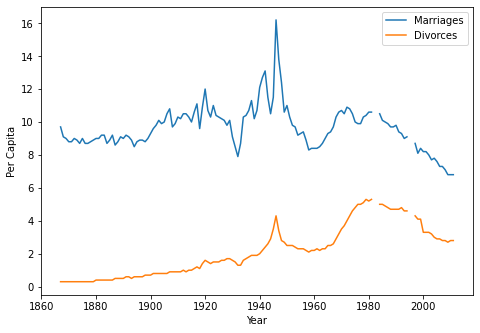

In [233]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(data['Year'],data['Marriages_per_1000'])
ax.plot(data['Year'],data['Divorces_per_1000'])
ax.legend(['Marriages','Divorces'])
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')

# Question 7 #
Create a vertical bar chart comparing the number of marriages and divorces per<br>
capita in the U.S. between 1900, 1950, and 2000.<br>
Don't forget to label your axes!<br>

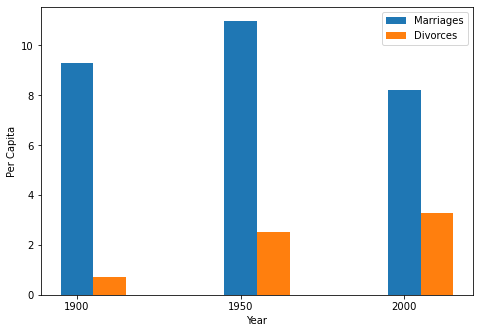

In [268]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
rows= data[data['Year'].isin([1900,1950,2000])]
ax.bar(rows['Year'],rows['Marriages_per_1000'],width =10)
ax.bar(rows['Year']+10,rows['Divorces_per_1000'],width =10)
ax.legend(['Marriages','Divorces'])
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita');
plt.xticks(rows['Year'], ('1900', '1950', '2000'));

# Question 8 #
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [276]:
act_df=pd.read_csv('actor_kill_counts.csv')


,Count
Actor,
Arnold Schwarzenegger,369
Chow Yun-Fat,295
Clint Eastwood,207
Clive Owen,194
Dolph Lundgren,239
Jet Li,201
Nicolas Cage,204
Sylvester Stallone,267
Tomisaburo Wakayama,226


In [331]:
act_df.set_index('Actor',inplace= True)

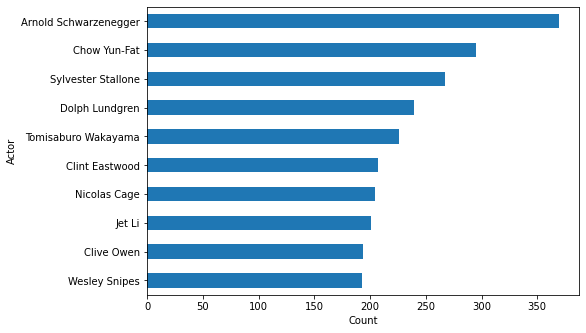

In [335]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
act_df['Count'].sort_values().plot.barh(tick_label=act_df.index)
ax.set_xlabel('Count');

# Question 9 #
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.<br>
Make sure that the pie chart is an even circle, labels the categories, and shows the<br>
percentage breakdown of the categories.

In [16]:
roman = pd.read_csv('roman-emperor-reigns.csv')
roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [25]:
assassinated =roman[roman['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
assassinated_percentage=len(assassinated)/len(roman)*100
other_death = (len(roman)-len(assassinated))/len(roman)*100

In [26]:
other_death

55.88235294117647

In [27]:
assassinated_percentage

44.11764705882353

In [38]:
x=[assassinated_percentage,other_death]
label=['assassinated','other death cause']

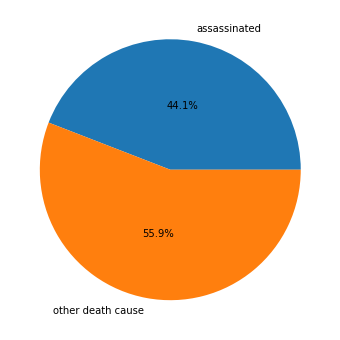

In [39]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=x, autopct="%.1f%%", labels=label, pctdistance=0.5);


# Question 10 #
Create a scatter plot showing the relationship between the total revenue earned by <br>
arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.<br>
Don't forget to label your axes!<br>
Color each dot according to its year.<br>
    

In [337]:
phd=pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
phd

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


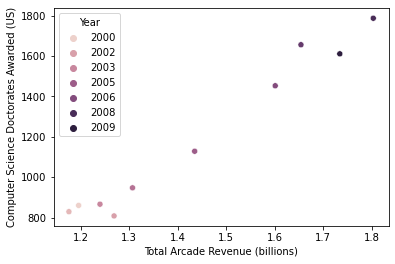

In [340]:
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=phd);